In [1]:
import torch

print(f"{torch.cuda.is_available()}")
print(f"{torch.cuda.device_count()}")

True
2


7864320


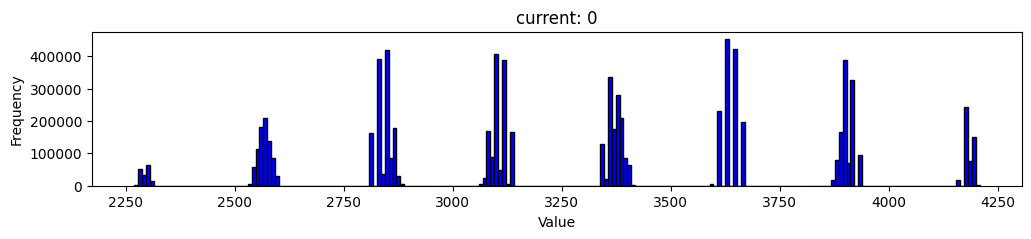

7864320


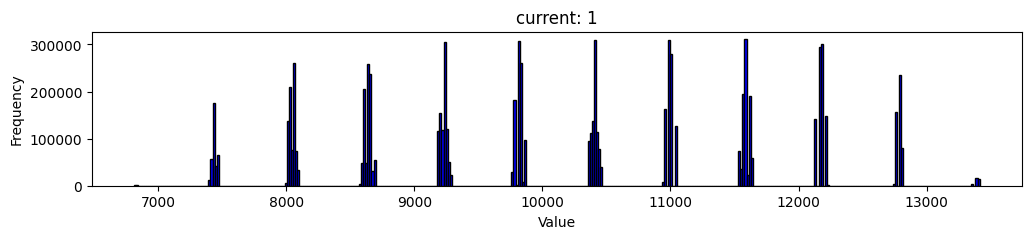

7864320


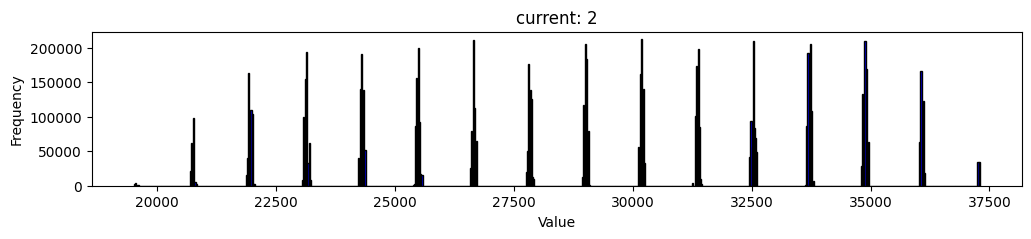

7864320


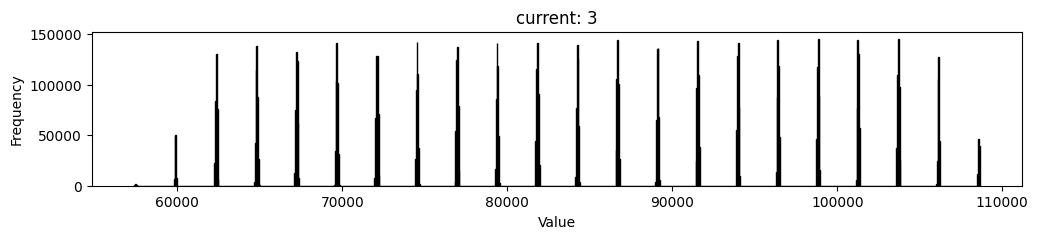

7864320


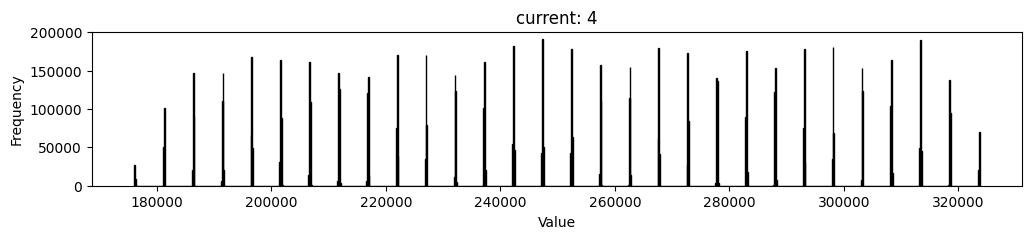

7864320


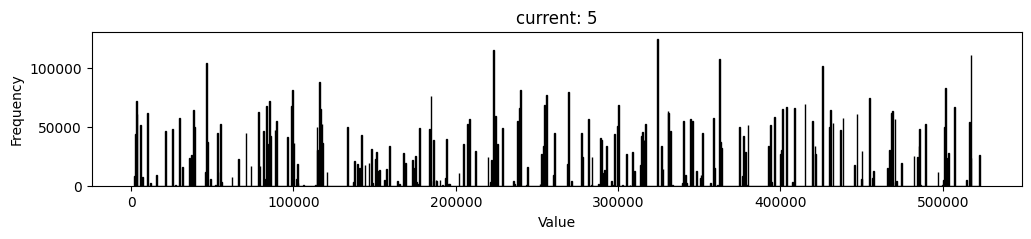

7864320


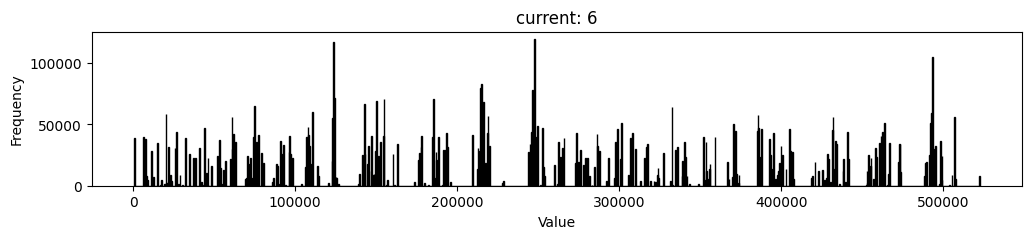

7864320


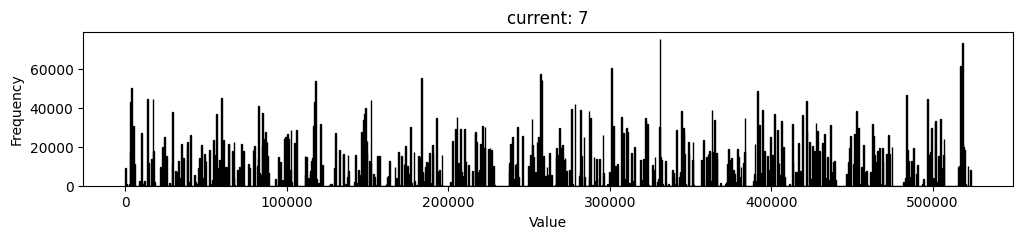

7864320


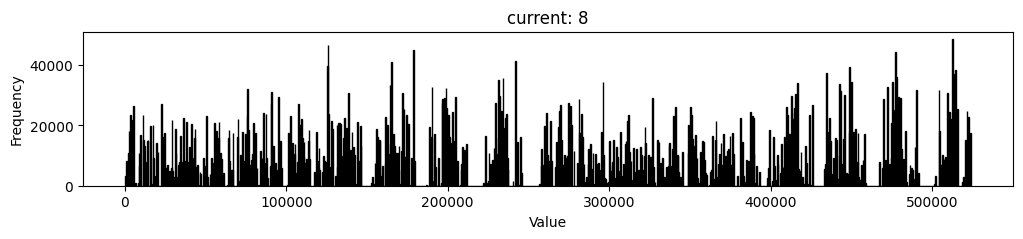

7864320


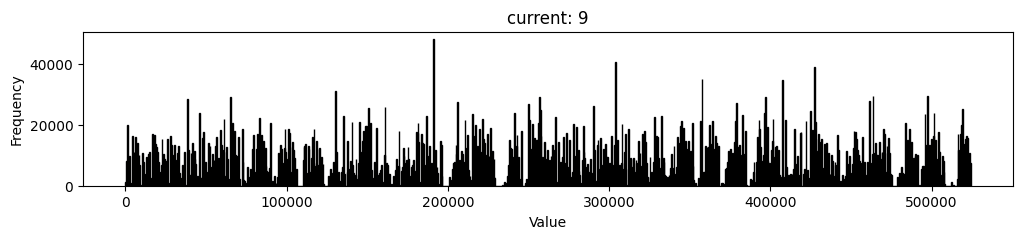

7864320


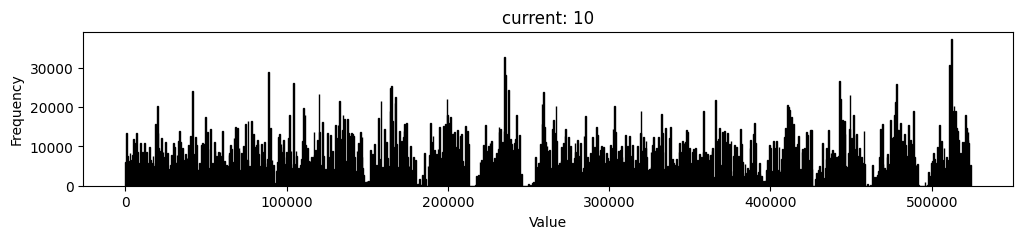

7864320


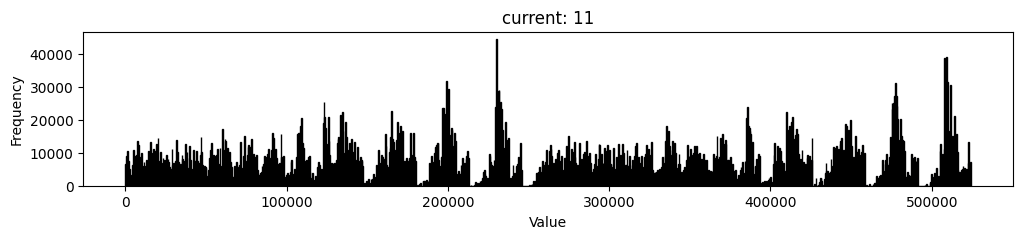

7864320


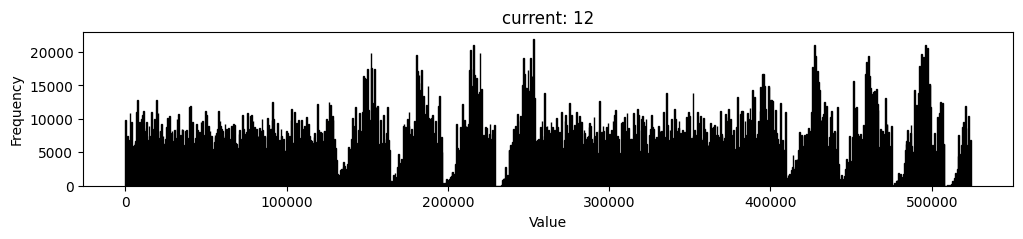

7864320


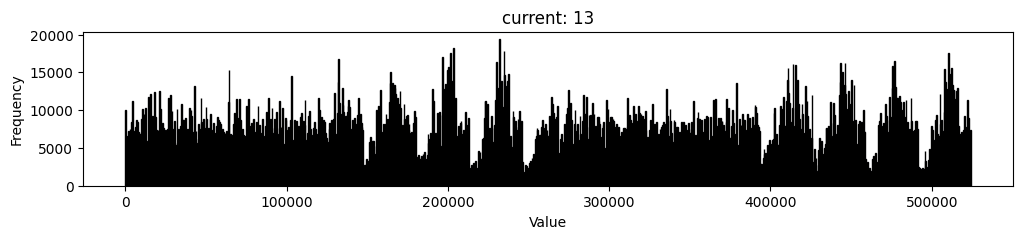

7864320


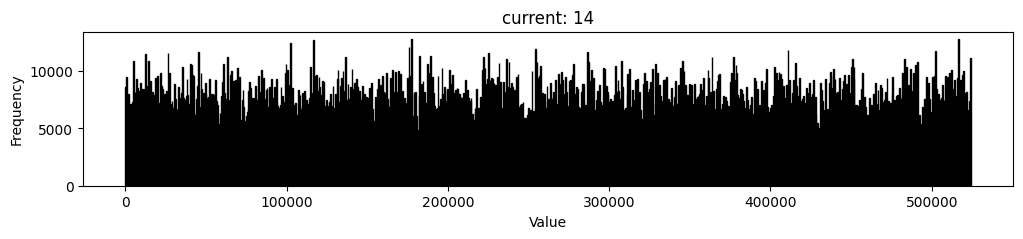

7864320


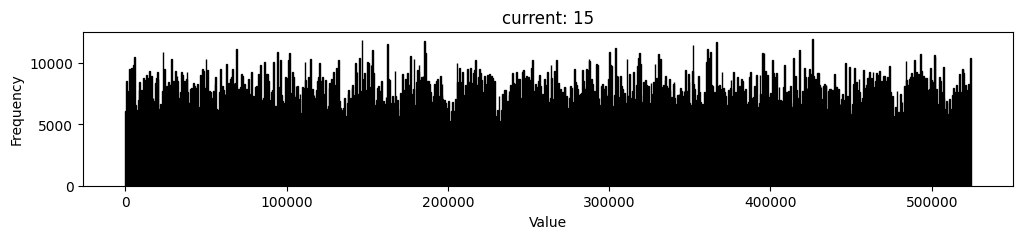

In [5]:
import glob
import natsort
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 2]
log_path = "/external-volume/log"

counter = dict()
for l in range(16):  counter[l] = dict()

for i in range(32):        
    data = np.load(f"{log_path}/{i}.npy")
    for l in range(16):
        unique, counts = np.unique(data[l,:,:].reshape(-1), return_counts=True)
        
        for idx in range(len(unique)):
            if unique[idx] not in counter[l]:
                counter[l][unique[idx]] = counts[idx]
            else:
                counter[l][unique[idx]] += counts[idx]

for l in range(16):
    unique = counter[l].keys()
    counts = counter[l].values()
    print(sum(counts))
    plt.hist(unique, bins=(len(unique) if len(unique) < 1024 else 1024), weights=counts, color='blue', edgecolor='black')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"current: {l}")
    
    plt.show()          